<a href="https://colab.research.google.com/github/DRRguez/DRRguez/blob/main/session2_20_08_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Heading1

## Heading2

##### Heading5

Este es un texto en negritas **bold**, este texto está 
en cursivas *italic*.

Este es un salto de linea.

Podemos agregar listas
* elemento 1
* elemento 2

También podemos escribir formulas

$$
g(x)=\int ^m _n x^2 dx
$$


In [1]:
print('Hello World!')

Hello World!


In [ ]:
!cat /proc/meminfo

In [13]:
a=25
b=67
c=a+b

In [21]:
print('a='+str(a)+', b='+str(b)+', c='+str(c))

a=25, b=67, c=92


In [24]:
print('a={}, b={}'.format(a,b))

a=25, b=67


# Modules

Aqui cargamos los modulos

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Brownian Motion 1-D

Generar una trayectoria de tipo Browniana de una dimensión haciendo uso del método Wiener.

In [ ]:
np.ones(shape=(10,5))

In [30]:
s_pos = 0
n_steps = 10000

#Brownian Walking vector.
bw = np.ones(n_steps)*s_pos

In [ ]:
np.random.choice([1,-1], p=[0.2, 0.8])

In [31]:
#Generate trajectory
for i in range(1,n_steps):
  #Sampling from an uniform distribution
  di = np.random.choice([1,-1])
  #Winer process
  bw[i] = bw[i-1]+(di/np.sqrt(n_steps))

In [ ]:
np.linspace(0,1,10)

<function matplotlib.pyplot.show(*args, **kw)>

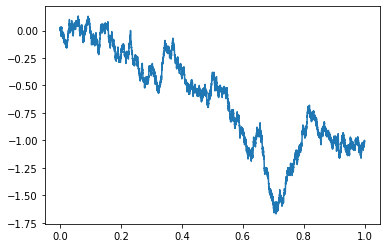

In [35]:
# times aux
times = np.linspace(0, 1, n_steps)

# Graficar con pyplot
plt.plot(times, bw)
plt.show

## Implementación alternativa Brownian Motion

Implementación más fácil de escalar.

In [43]:
db = np.random.choice([1,-1], size=10000)*1/np.sqrt(10000)
np.cumsum(db)

array([0.01, 0.02, 0.03, ..., 1.04, 1.03, 1.02])

In [57]:
# init parameters
n = 10000

# Warning
if n < 30:
  print('Warning! The number of steps is too small')

# Vector with displacements
dB = np.random.choice([1,-1], size=n-1)*1/np.sqrt(n)

# Init Brownian Walker
bw = np.zeros(shape=(1,))

# Generate trajectory by accumulation displacement
bw = np.concatenate((bw,np.cumsum(dB)))

<function matplotlib.pyplot.show(*args, **kw)>

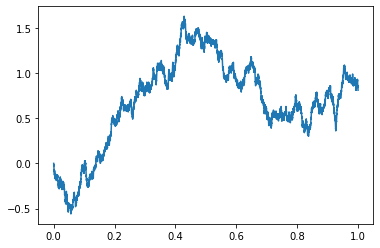

In [58]:
#Plot Brownian trajectory
times = np.linspace(0,1,n)

plt.plot(times,bw)
plt.show